### 1st goal Minimize categorical features and max numerical...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cleaned data to use:

df= pd.read_csv("/content/updated_cosmo_chemicals.csv")
print(df.head())

   CSF   CasNumber InitialDateReported MostRecentDateReported  \
0  NaN  13463-67-7          2009-06-17             08/28/2013   
1  NaN  65996-92-1          2009-07-01             07/01/2009   
2  NaN    140-67-0          2009-07-01             07/01/2009   
3  NaN  13463-67-7          2009-07-09             08/28/2013   
4  NaN  13463-67-7          2009-07-09             08/28/2013   

  DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  \
0       2011-02-01        2009-07-09        07/09/2009                 NaN   
1              NaN        2009-07-01        07/01/2009                 NaN   
2              NaN        2009-07-02        07/02/2009                 NaN   
3              NaN        2009-07-09        07/09/2009                 NaN   
4       2011-02-01        2009-07-09        07/09/2009                 NaN   

   ChemicalCount                                       ProductName  ...  \
0              1  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADE

Reformulated
0    111650
1      2985
Name: count, dtype: int64
Reformulated Percentage: 2.60%


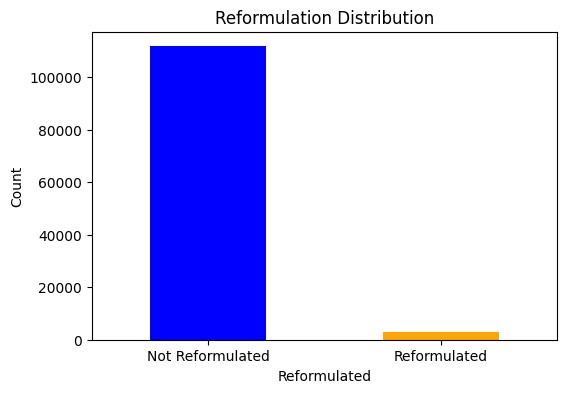

In [3]:
import matplotlib.pyplot as plt

# Create binary reformulated column
df['Reformulated'] = df['ChemicalDateRemoved'].notna().astype(int)

# Count occurrences
reformulated_counts = df['Reformulated'].value_counts()

print(reformulated_counts)
print(f"Reformulated Percentage: {reformulated_counts[1] / reformulated_counts.sum() * 100:.2f}%")

plt.figure(figsize=(6,4))
reformulated_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xticks(ticks=[0,1], labels=['Not Reformulated', 'Reformulated'], rotation=0)
plt.ylabel('Count')
plt.title('Reformulation Distribution')
plt.show()


HazardType
Not Hazardous            102203
Potentially Hazardous      4146
Confirmed Carcinogen       2979
Not Specified               668
Suspected Carcinogen        401
Reproductive Toxicant       103
Name: count, dtype: int64


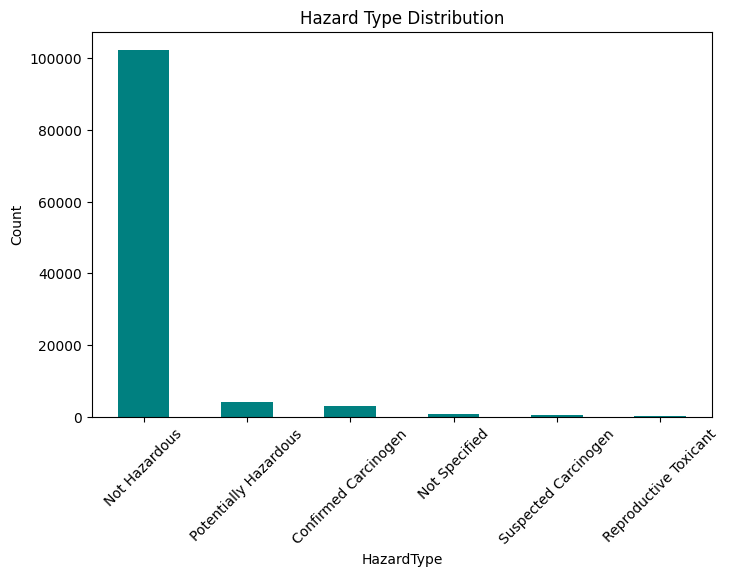

In [4]:
# Count occurrences
hazard_counts = df['HazardType'].value_counts()

# Print the distribution
print(hazard_counts)

# Plot
plt.figure(figsize=(8,5))
hazard_counts.plot(kind='bar', color='teal')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Hazard Type Distribution')
plt.show()


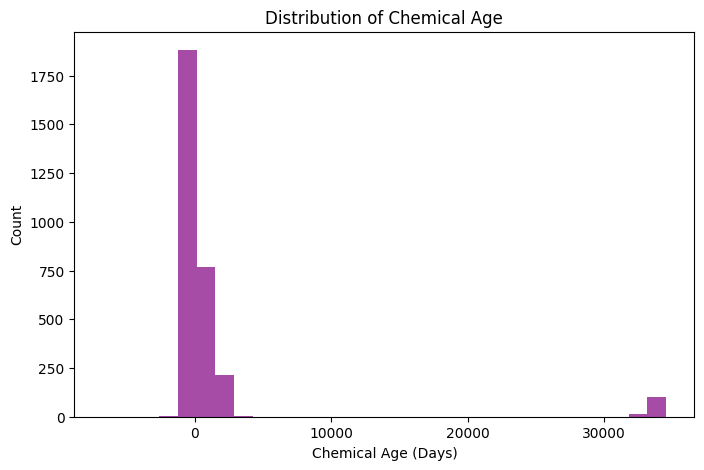

In [5]:
# Convert date columns to datetime if not already done
df['ChemicalDateRemoved'] = pd.to_datetime(df['ChemicalDateRemoved'])
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'])

# Calculate ChemicalAge
df['ChemicalAge'] = (df['ChemicalDateRemoved'] - df['InitialDateReported']).dt.days

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['ChemicalAge'].dropna(), bins=30, color='purple', alpha=0.7)
plt.xlabel('Chemical Age (Days)')
plt.ylabel('Count')
plt.title('Distribution of Chemical Age')
plt.show()


I think Im going to do binary classification aka reformulated will be my target

In [6]:
df['Reformulated'] = df['ChemicalDateRemoved'].notna().astype(int)

In [7]:
df.head()

,CSF,CasNumber,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,ProductName,...,HazardType,ReformulationCount,ChemicalAge,AverageChemicalAge,ProductLifespan,ChemicalCategoryCount,Efficacy,Safety,Sustainability,Reformulated
0,NaN,13463-67-7,2009-06-17,08/28/2013,2011-02-01,2009-07-09,07/09/2009,NaT,1,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,...,Not Hazardous,0,NaN,5606.0,594,64945,6.0,10,8.0,0
1,NaN,65996-92-1,2009-07-01,07/01/2009,NaN,2009-07-01,07/01/2009,NaT,2,Glover's Medicated Shampoo,...,Confirmed Carcinogen,0,NaN,5613.5,5614,1,4.0,1,3.0,0
2,NaN,140-67-0,2009-07-01,07/01/2009,NaN,2009-07-02,07/02/2009,NaT,2,Glover's Medicated Shampoo,...,Suspected Carcinogen,0,NaN,5613.5,5614,32,5.0,3,6.0,0
3,NaN,13463-67-7,2009-07-09,08/28/2013,NaN,2009-07-09,07/09/2009,NaT,1,PRECISION GLIMMER EYE LINER-ALL SHADES �,...,Not Hazardous,0,NaN,5606.0,5606,64945,6.0,10,8.0,0
4,NaN,13463-67-7,2009-07-09,08/28/2013,2011-02-01,2009-07-09,07/09/2009,NaT,1,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,...,Not Hazardous,0,NaN,5606.0,572,64945,6.0,10,8.0,0


In [8]:
column_types = df.dtypes

numeric_cols = column_types[column_types != 'object'].index.tolist()
categorical_cols = column_types[column_types == 'object'].index.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['InitialDateReported', 'ChemicalDateRemoved', 'ChemicalCount', 'ReformulationCount', 'ChemicalAge', 'AverageChemicalAge', 'ProductLifespan', 'ChemicalCategoryCount', 'Efficacy', 'Safety', 'Sustainability', 'Reformulated']
Categorical columns: ['CSF', 'CasNumber', 'MostRecentDateReported', 'DiscontinuedDate', 'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ProductName', 'CompanyName', 'BrandName', 'PrimaryCategory', 'SubCategory', 'ChemicalName', 'HazardType']


In [9]:
print(column_types)

CSF                               object
CasNumber                         object
InitialDateReported       datetime64[ns]
MostRecentDateReported            object
DiscontinuedDate                  object
ChemicalCreatedAt                 object
ChemicalUpdatedAt                 object
ChemicalDateRemoved       datetime64[ns]
ChemicalCount                      int64
ProductName                       object
CompanyName                       object
BrandName                         object
PrimaryCategory                   object
SubCategory                       object
ChemicalName                      object
HazardType                        object
ReformulationCount                 int64
ChemicalAge                      float64
AverageChemicalAge               float64
ProductLifespan                    int64
ChemicalCategoryCount              int64
Efficacy                         float64
Safety                             int64
Sustainability                   float64
Reformulated    

The error ValueError: could not convert string to float: '5858-81-1' is happening because there are still non-numeric columns when applying SMOTE. Specifically, some columns like CasNumber are composed of string identifiers that can't be converted to floats directly.

In [10]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

In [11]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Impute numerical columns with mean
# Numerical columns are those with data types 'float64' or 'int64'
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Numerical columns before imputation: {numerical_cols}")

# SimpleImputer will fill missing values in numerical columns with the mean value of each column
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


Numerical columns before imputation: ['ChemicalCount', 'ReformulationCount', 'ChemicalAge', 'AverageChemicalAge', 'ProductLifespan', 'ChemicalCategoryCount', 'Efficacy', 'Safety', 'Sustainability', 'Reformulated']


Explanation:
Numerical columns often have missing values that can be imputed with the mean value. This ensures no data loss while maintaining the general distribution of the column.

In [12]:
# Impute categorical columns with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns before imputation: {categorical_cols}")

# SimpleImputer will fill missing values in categorical columns with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


Categorical columns before imputation: ['CSF', 'CasNumber', 'MostRecentDateReported', 'DiscontinuedDate', 'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ProductName', 'CompanyName', 'BrandName', 'PrimaryCategory', 'SubCategory', 'ChemicalName', 'HazardType']


Categorical columns are imputed with the most frequent value (mode). This helps avoid losing information due to missing categories.

In [13]:
# Convert date columns to datetime format
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'], errors='coerce')
df['ChemicalCreatedAt'] = pd.to_datetime(df['ChemicalCreatedAt'], errors='coerce')
df['ChemicalUpdatedAt'] = pd.to_datetime(df['ChemicalUpdatedAt'], errors='coerce')
df['ChemicalDateRemoved'] = pd.to_datetime(df['ChemicalDateRemoved'], errors='coerce')
df['MostRecentDateReported'] = pd.to_datetime(df['MostRecentDateReported'], errors='coerce')
df['DiscontinuedDate'] = pd.to_datetime(df['DiscontinuedDate'], errors='coerce')


Date columns need to be converted to a datetime format to handle them properly. The errors='coerce' argument ensures that any invalid date is converted to NaT (Not a Time), which will be handled later.

In [14]:
# Use the earliest date in 'InitialDateReported' as a reference date
reference_date = df['InitialDateReported'].min()

# Convert all date columns to the number of days since the reference date
df['DaysSinceInitial'] = (df['InitialDateReported'] - reference_date).dt.days
df['DaysSinceCreated'] = (df['ChemicalCreatedAt'] - reference_date).dt.days
df['DaysSinceUpdated'] = (df['ChemicalUpdatedAt'] - reference_date).dt.days
df['DaysSinceRemoved'] = (df['ChemicalDateRemoved'] - reference_date).dt.days
df['DaysSinceMostRecentReported'] = (df['MostRecentDateReported'] - reference_date).dt.days
df['DaysSinceDiscontinued'] = (df['DiscontinuedDate'] - reference_date).dt.days


Rather than working directly with date columns, it's often easier to convert them to numerical values that represent the number of days since a reference date. This helps the model work with continuous numerical data.

In [15]:
# Drop the original date columns since we've transformed them into numerical columns
df.drop(columns=['InitialDateReported', 'ChemicalCreatedAt', 'ChemicalUpdatedAt',
                 'ChemicalDateRemoved', 'MostRecentDateReported', 'DiscontinuedDate'], inplace=True)


We no longer need the original date columns because we’ve created numerical features (DaysSince...). Dropping them reduces the dataset's complexity and avoids redundancy.

In [16]:
# Check for remaining missing values in the dataframe
print("Missing values after imputation:")
print(df.isna().sum())

Missing values after imputation:
CSF                                 0
CasNumber                           0
ChemicalCount                       0
ProductName                         0
CompanyName                         0
BrandName                           0
PrimaryCategory                     0
SubCategory                         0
ChemicalName                        0
HazardType                          0
ReformulationCount                  0
ChemicalAge                         0
AverageChemicalAge                  0
ProductLifespan                     0
ChemicalCategoryCount               0
Efficacy                            0
Safety                              0
Sustainability                      0
Reformulated                        0
DaysSinceInitial                    0
DaysSinceCreated                    0
DaysSinceUpdated                    0
DaysSinceRemoved               111650
DaysSinceMostRecentReported         0
DaysSinceDiscontinued               0
dtype: int64


It’s crucial to confirm that all missing values have been imputed. This step ensures no NaN values remain before proceeding to the next steps.

In [17]:
# Drop non-numeric columns that can't be used for SMOTE
non_numeric_cols = ['CSF', 'CasNumber', 'ProductName', 'CompanyName', 'BrandName', 'PrimaryCategory', 'SubCategory', 'ChemicalName', 'HazardType']
df.drop(columns=non_numeric_cols, inplace=True)

SMOTE can only be applied to numeric features. We drop non-numeric columns that aren’t suitable for resampling.

In [18]:
# Check the data types of the columns after preprocessing
print("Data types of columns after preprocessing:")
print(df.dtypes)

Data types of columns after preprocessing:
ChemicalCount                  float64
ReformulationCount             float64
ChemicalAge                    float64
AverageChemicalAge             float64
ProductLifespan                float64
ChemicalCategoryCount          float64
Efficacy                       float64
Safety                         float64
Sustainability                 float64
Reformulated                   float64
DaysSinceInitial                 int64
DaysSinceCreated                 int64
DaysSinceUpdated                 int64
DaysSinceRemoved               float64
DaysSinceMostRecentReported      int64
DaysSinceDiscontinued            int64
dtype: object


We ensure that the columns are in the correct data type format. This step helps confirm that all necessary columns are numeric (or have been encoded) and that no categorical data remains in the form of strings.



In [19]:
# Identify remaining categorical columns and encode them
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns before encoding: {categorical_cols}")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

# Check the dataframe after encoding categorical columns
print("DataFrame after encoding categorical columns:")
print(df.head())


Categorical columns before encoding: []
DataFrame after encoding categorical columns:
   ChemicalCount  ReformulationCount  ChemicalAge  AverageChemicalAge  \
0            1.0                 0.0  1663.364824              5606.0   
1            2.0                 0.0  1663.364824              5613.5   
2            2.0                 0.0  1663.364824              5613.5   
3            1.0                 0.0  1663.364824              5606.0   
4            1.0                 0.0  1663.364824              5606.0   

   ProductLifespan  ChemicalCategoryCount  Efficacy  Safety  Sustainability  \
0            594.0                64945.0       6.0    10.0             8.0   
1           5614.0                    1.0       4.0     1.0             3.0   
2           5614.0                   32.0       5.0     3.0             6.0   
3           5606.0                64945.0       6.0    10.0             8.0   
4            572.0                64945.0       6.0    10.0             8.0   



Any remaining categorical columns are encoded into numeric labels. This step is necessary because machine learning algorithms cannot handle non-numeric data. LabelEncoder converts categorical values into unique integer labels.

In [20]:
# Separate features (X) and target (y)
X = df.drop(columns=['Reformulated'])  # Drop the target column from features
y = df['Reformulated']

We define X as the features (input variables) and y as the target (output variable) that the model will predict.

In [21]:
# Check for missing values in the features (X) and target (y)
print("Missing values in X and y:")
print(X.isna().sum())
print(y.isna().sum())

Missing values in X and y:
ChemicalCount                       0
ReformulationCount                  0
ChemicalAge                         0
AverageChemicalAge                  0
ProductLifespan                     0
ChemicalCategoryCount               0
Efficacy                            0
Safety                              0
Sustainability                      0
DaysSinceInitial                    0
DaysSinceCreated                    0
DaysSinceUpdated                    0
DaysSinceRemoved               111650
DaysSinceMostRecentReported         0
DaysSinceDiscontinued               0
dtype: int64
0


We double-check that there are no missing values left in the features (X) or target (y) before applying SMOTE. This is a precautionary step to ensure the data is clean.

In [29]:
# Recheck for missing values in the features (X)
print("Missing values in X before SMOTE:")
print(X.isna().sum())

# If missing values exist, use SimpleImputer to fill them
imputer_X = SimpleImputer(strategy='mean')  # Impute with the mean value for numerical columns
X = imputer_X.fit_transform(X)

# Check again after imputation
print("Missing values in X after imputation:")
print(pd.DataFrame(X).isna().sum())

Missing values in X before SMOTE:
ChemicalCount                       0
ReformulationCount                  0
ChemicalAge                         0
AverageChemicalAge                  0
ProductLifespan                     0
ChemicalCategoryCount               0
Efficacy                            0
Safety                              0
Sustainability                      0
DaysSinceInitial                    0
DaysSinceCreated                    0
DaysSinceUpdated                    0
DaysSinceRemoved               111650
DaysSinceMostRecentReported         0
DaysSinceDiscontinued               0
dtype: int64
Missing values in X after imputation:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
try:
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print("Before SMOTE:", Counter(y))
    print("After SMOTE:", Counter(y_resampled))
except ValueError as e:
    print("Error during SMOTE:", e)

Before SMOTE: Counter({0.0: 111650, 1.0: 2985})
After SMOTE: Counter({0.0: 111650, 1.0: 111650})


Training set distribution: Counter({0.0: 89320, 1.0: 2388})
Test set distribution: Counter({0.0: 22330, 1.0: 597})


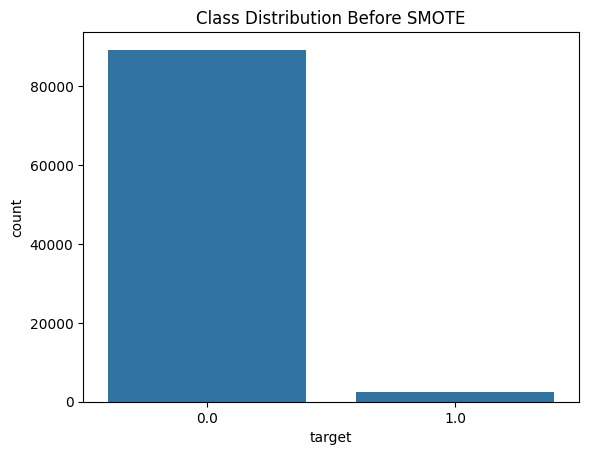

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


# Split the data into features (X) and target (y)
X = df.drop(columns=['Reformulated'])
y = df['Reformulated']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution in both sets
print(f"Training set distribution: {Counter(y_train)}")
print(f"Test set distribution: {Counter(y_test)}")



df_train_before_smote = X_train.copy()
df_train_before_smote['target'] = y_train.copy()


# Before SMOTE
sns.countplot(x='target', data=df_train_before_smote)
plt.title("Class Distribution Before SMOTE")
plt.show()

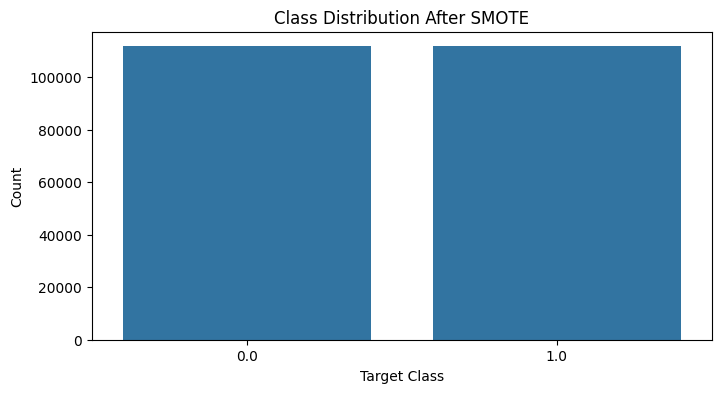

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Convert y_resampled to a DataFrame
df_resampled = pd.DataFrame({'target': y_resampled})

# Class Distribution After SMOTE
plt.figure(figsize=(8,4))
sns.countplot(x='target', data=df_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()


SMOTE (Synthetic Minority Over-sampling Technique) is used to handle imbalanced classes by creating synthetic samples for the minority class. This helps improve model performance by ensuring that both classes are equally represented.

In [ ]:
# Assuming 'history_before_smote' and 'history_after_smote' are the training histories
plt.plot(df_train_before_smote.history['accuracy'], label='Training Accuracy Before SMOTE')
plt.plot(df_train_before_smote.history['val_accuracy'], label='Validation Accuracy Before SMOTE')
plt.plot(history_after_smote.history['accuracy'], label='Training Accuracy After SMOTE')
plt.plot(history_after_smote.history['val_accuracy'], label='Validation Accuracy After SMOTE')

plt.title("Learning Curves Before and After SMOTE")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


##TRAIN the model, finally omg

In [24]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Reformulated'])
y = df['Reformulated']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution in both sets
print(f"Training set distribution: {Counter(y_train)}")
print(f"Test set distribution: {Counter(y_test)}")


## Using Iterative modeling lecture as a reference

In [ ]:
# Baseline Model - No preprocessing (Using only numerical features)
X_train_baseline = X_train.select_dtypes(include=[np.number]).fillna(X_train.select_dtypes(include=[np.number]).mean())
X_test_baseline = X_test.select_dtypes(include=[np.number]).fillna(X_test.select_dtypes(include=[np.number]).mean())


baseline_model = LogisticRegression()
baseline_model.fit(X_train_baseline, y_train)
baseline_preds = baseline_model.predict(X_test_baseline)
baseline_acc = accuracy_score(y_test, baseline_preds)
print(f"Baseline Model Accuracy (No Preprocessing): {baseline_acc:.4f}")

In [ ]:
## cuz of error above, even though I got  98% accuracy

This could be the reason... **ConvergenceWarning** indicating that the model's solver reached the maximum number of iterations before converging. This can happen when the data is not scaled properly,

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_baseline)
X_test_scaled = scaler.transform(X_test_baseline)

# Train the model on scaled data
baseline_model = LogisticRegression(max_iter=1000)  # Optionally increase max_iter
baseline_model.fit(X_train_scaled, y_train)
baseline_preds = baseline_model.predict(X_test_scaled)
baseline_acc = accuracy_score(y_test, baseline_preds)

print(f"Baseline Model Accuracy (After Scaling): {baseline_acc:.4f}")


##Model Selection like the lecture...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Ensure y_train is integer type
y_train_fixed = y_train.astype(int)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train and evaluate each model with cross-validation
cv_results = {}

for name, model in models.items():
    try:
        if name == "XGBoost":  # Use cross_validate for XGBoost compatibility
            scores = cross_validate(model, X_train_scaled, y_train_fixed, cv=5, scoring='accuracy', return_estimator=False)
            avg_score = np.mean(scores['test_score'])
        else:
            scores = cross_val_score(model, X_train_scaled, y_train_fixed, cv=5, scoring='accuracy')
            avg_score = np.mean(scores)

        cv_results[name] = avg_score
        print(f"{name}: Cross-Validation Accuracy = {avg_score:.4f}")
    except Exception as e:
        print(f"Error with {name}: {e}")

# Display results
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=["Model", "CV Accuracy"])
print("\nModel Selection - Cross-Validation Performance:")
print(cv_results_df)

# Select best model
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

# Hyperparameter Tuning for the Best Model
param_grid = {
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    "XGBoost": {'n_estimators': [100, 200], 'max_depth': [3, 5]},
}.get(best_model_name, {})

# Run hyperparameter tuning if needed
if param_grid:
    search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    search.fit(X_train_scaled, y_train_fixed)
    best_model = search.best_estimator_
    print(f"\nBest Hyperparameters for {best_model_name}: {search.best_params_}")

# Train and Evaluate Final Model
best_model.fit(X_train_scaled, y_train_fixed)
best_preds = best_model.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

print("\nClassification Report:")
print(classification_report(y_test, best_preds))
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


###Just some things to keep in mind
Scaling the data:

The StandardScaler is applied to both the training and testing data (X_train_combined and X_test_combined).
The training set is fitted and transformed, while the test set is only transformed using the fitted scaler (to prevent data leakage).
Model Training:

The model training and evaluation are done using the scaled data (X_train_scaled and X_test_scaled).
Cross-validation and Hyperparameter Tuning:

Both cross-validation and hyperparameter tuning are done using the scaled features.

In [ ]:
### Theres more improving cells in the lecture, start next session....